# `Proyecto Final Módulo 5`

## **Spaceship Titanic Classification**
### Condiciones:

### Para el proyecto utilizar el dataset de la siguiente competicion de Kaggle:
- [Enlace al proyecto en Kaggle](https://www.kaggle.com/competitions/spaceship-titanic/data)

### Los entregables finales son :
- Link del codigo Github
- Link del codigo Google Colab
### El repositorio debe tener los siguientes archivos:
- main.py
- My_notebook.ipynb -> en mi caso es model_train.ipynb
- ~~Dockerfile~~ (Este se eliminó como requerimiento, según indicación en la clase)
- Requirements.txt
- .gitignore
> En el repositorio no debe de estar el modelo , el normalizador, el .csv , ni la carpeta del entorno virtual si es que se trabaja localmente con un entorno.

## Instrucciones:
> De todas estas instrucciones no se deben realizar todas. Crear Dockerfile no es requisito, tampoco trabajar con ramas en GitHub.
> Se realizará el push del repositorio a GitHub ya con el trabajo terminado.

Item |       Funcionalidad      |                 Descripción                  |
-----|--------------------------|----------------------------------------------|
1    | Cargar .csv              | Se utiliza la libreria pandas para cargar el archivo train.csv
2    | Usar funciones           | Se utilizan funciones para hacer el codigo mas legible. Crear minimo 4 funciones
3    |  Limpieza de datos       |  Se agregan lineas de codigo que permite describir y contar los Nan de la tabla de datos
4    | Analisis y visualización de datos        |  Se agregan lineas de codigo que permita visualizar los atributos. Utilizar seaborn
5    | Train/Val/Test esplit    | Se divide el dataset en 3 partes: train, cross validation y test set
6    | Seleccion de variables   | Se selecciona las variables que se utilizarán para la predicción. Probar las mas convenientes
7    | Normalizador             | Se agregan líneas de codigo que normalizan/escalan los datos de entrada segun su media y varianza.
8    | Ajuste de hiperparámetros - Learning rate            | Se realiza el ajuste de los hiperparámetros o se implementa una funcion que realiza el entrenamiento del modelo varias veces sobre distintos valores de learning_rate, según el tipo de modelo que se vaya a utilizar.
9    | Entrenamiento del modelo | Se seleccionan los mejores valores de hiperparámetros, y se entrena el modelo final.
10   | Testear modelo           | Se testea el modelo entrenado sobre el dataset de testeo. No utilizar el dataset de testeo para tunear los hiperparametros.
11   | Guardar modelo y normalizador | Se tiene una funcion que guarda el modelo entrenado. Si se usa scikit_learn, guardar en formato .pickle. Si se usa tensorflow, guardar en formato .h5
12   | Crear archivo .py        | Se crea un archivo main.py donde se carga el modelo y el normalizador guardado. Este codigo solo debe predecir, no debe haber codigo de entrenamiento. Se agregan lineas de codigo para que el programa reciba argumentos desde la terminal.
13   | Crear requirements       | Se crea el archivo requirements.txt donde se incluyen todas la librerias/frameworks utilizados. Este servira para instalar estas mismas librerias en otros entornos.
14   | Crear dockerfile         | Se toma formato de los ejercicios en clase y se crea un archivo Dockerfile que servira de instrucciones para crear la imagen Docker
15   | Crear repositorio en Github | Se utiliza Github para crear un repositorio remoto. Se vincula este repositorio remoto al repositorio local
16   | Guardar codigo en el repositorio | Se utiliza git para guardar el codigo en un repositorio.

> Este paso no se realiza:
> 
> Crear una rama dev donde debe haber minimo 3 commits de distintos avances del codigo. Al final, juntar esta rama dev a la master. La rama master solo debe tener dos commit (la original y la del merge). 
> 
> Este paso si se realiza:
> 
> Se hace push al repositorio remoto de Github. Se debe crear un .gitignore


------------------------------------------------------------------------------

## **`Código:`**

### 0. Cargar librerías

In [426]:
import pandas as pd # para cargar y leer el csv, y manipulaciones con el df
import matplotlib.pyplot as plt # Para visualización y análisis
import seaborn as sns # Para visualización y análisis
from sklearn.preprocessing import OneHotEncoder # para conversión de datos categóricos
from sklearn.model_selection import train_test_split # para dividir en test de entrenamiento y evaluación
from sklearn.preprocessing import StandardScaler # para normalización
from sklearn.model_selection import GridSearchCV # para ajuste de hiperparámetros
from sklearn.linear_model import LogisticRegression # para usar el modelo de regresión logística
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # para evaluar distintas métricas
import pickle # para exportar el modelo y el normalizador


### 1. Cargar CSV

In [427]:
# Cargar y leer la data
data = "train.csv"
df = pd.read_csv(data)

### 2. Usar funciones

In [428]:
# Lee y carga la data
def read_csv(data):
    df = pd.read_csv(data)
    return df

# Imprime el head del df
def print_head(data):
    df = pd.read_csv(data)
    return df.head()

# Imprime el tail del df
def print_tail(data):
    df = pd.read_csv(data)
    return df.tail()

# Hace un análisis exploratorio básico
def explore_data(data):
    df = pd.read_csv(data)

    # Mostrar las columnas del DataFrame
    df_columns = df.columns
    print(f"Columnas del DataFrame:\n{df_columns}\n")

    # Mostrar información general del DataFrame
    print("Información general del DataFrame:")
    df.info()
    print("\n")

    # Contar valores nulos por columna
    nulls_per_column = df.isnull().sum()
    print(f"Valores nulos por columna:\n{nulls_per_column}\n")

    # Mostrar estadísticas descriptivas del DataFrame
    descriptive_stats = df.describe()
    print(f"Estadísticas descriptivas del DataFrame:\n{descriptive_stats}\n")


In [429]:
read_csv(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [430]:
print_head(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [431]:
print_tail(data)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


### EDA: Análisis exploratorio

In [432]:
explore_data(data)

Columnas del DataFrame:
Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493

### 3. Limpieza de datos

In [433]:
# Limpieza de datos
def clean_data(df):
    # Llenar valores nulos en columnas categóricas con la moda
    categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
    df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

    # Llenar valores nulos en columnas numéricas con la mediana
    numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

    # Llenar valores nulos en la columna 'Age' con la mediana según 'HomePlanet'
    df['Age'] = df.groupby('HomePlanet')['Age'].transform(lambda x: x.fillna(x.median()))

    return df

# Aplicar la función de limpieza
df = clean_data(df)

# Verificar si quedan valores nulos
nulls_after_cleaning = df.isnull().sum()
print("Valores nulos después de la limpieza:")
print(nulls_after_cleaning)

Valores nulos después de la limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64


C:\Users\nahue\AppData\Local\Temp\ipykernel_28460\3616947409.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


#### 4. Análisis y visualización de los datos

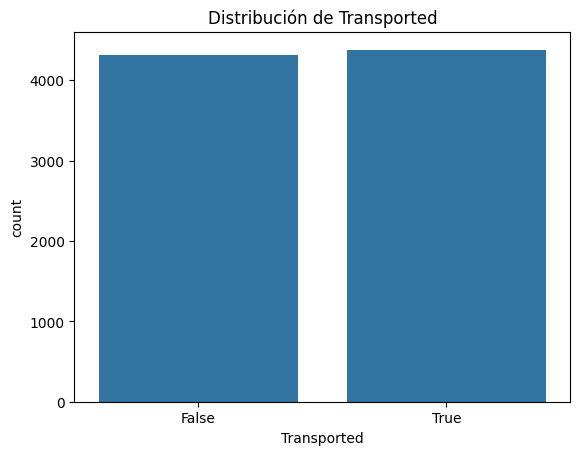

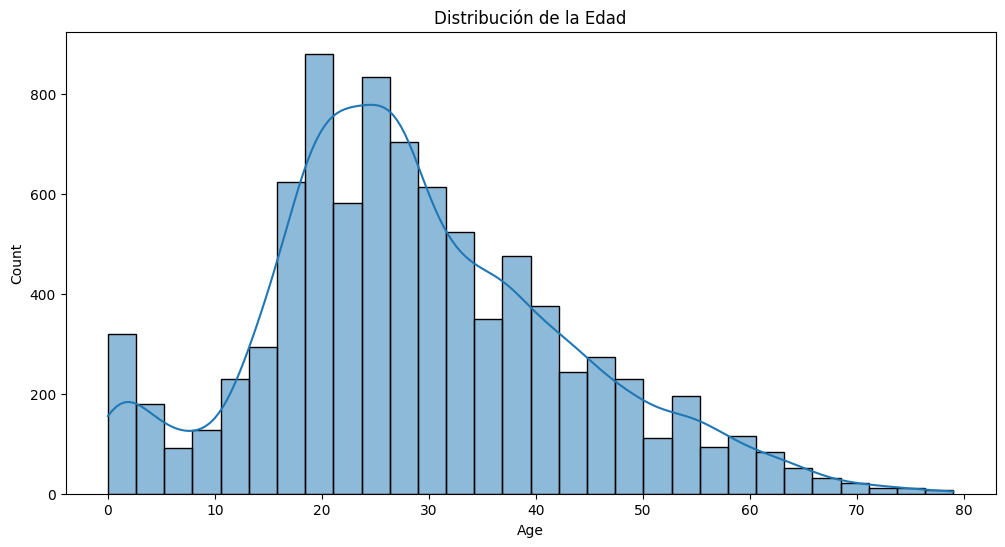

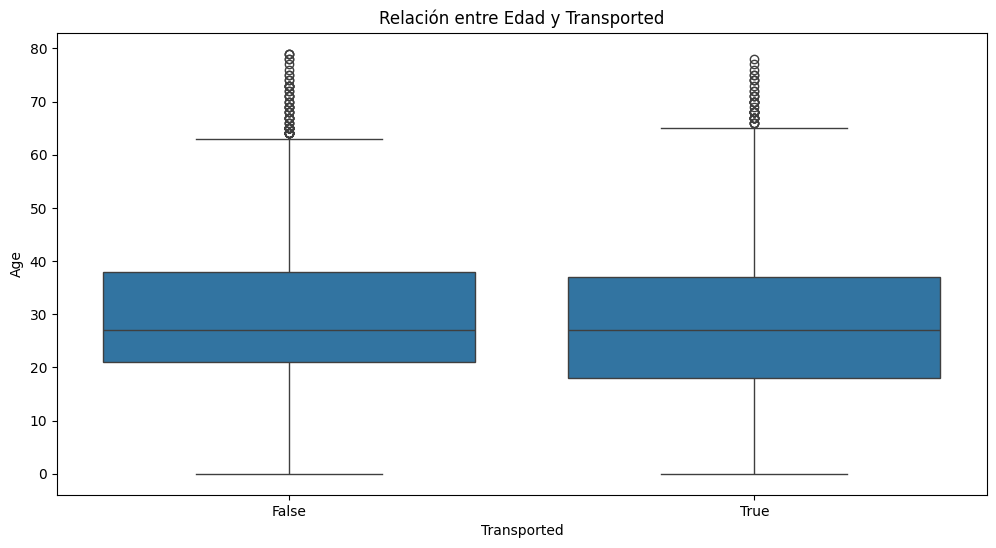

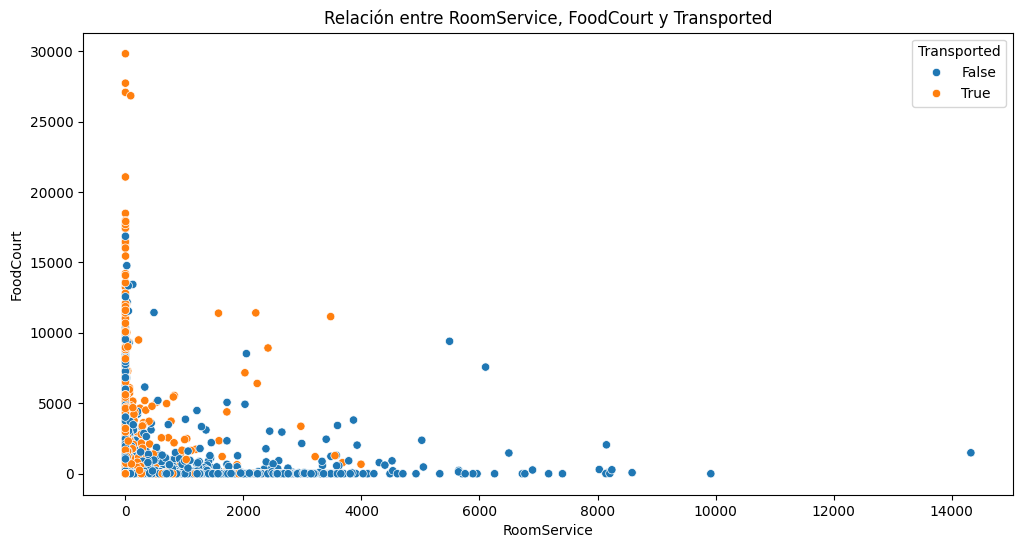

In [434]:
# Visualización de la distribución de la variable objetivo 'Transported'
sns.countplot(x='Transported', data=df)
plt.title('Distribución de Transported')
plt.show()

# Visualización de la distribución de la edad 'Age'
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Visualización de la relación entre 'Age' y 'Transported'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Transported', y='Age', data=df)
plt.title('Relación entre Edad y Transported')
plt.show()

# Visualización de la relación entre 'RoomService' y 'FoodCourt' con 'Transported'
plt.figure(figsize=(12, 6))
sns.scatterplot(x='RoomService', y='FoodCourt', hue='Transported', data=df)
plt.title('Relación entre RoomService, FoodCourt y Transported')
plt.show()


### 5. Dividiendo el dataset en tres partes: `Train/Val/Test Split`

In [435]:
# Seleccionar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=['PassengerId', 'Name', 'Transported'])
y = df['Transported']

# Dividir en conjuntos de entrenamiento, validación cruzada y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Mostrar las formas de los conjuntos resultantes
print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")


Train set: (5215, 11)
Validation set: (1739, 11)
Test set: (1739, 11)


### 6. Selección de variables

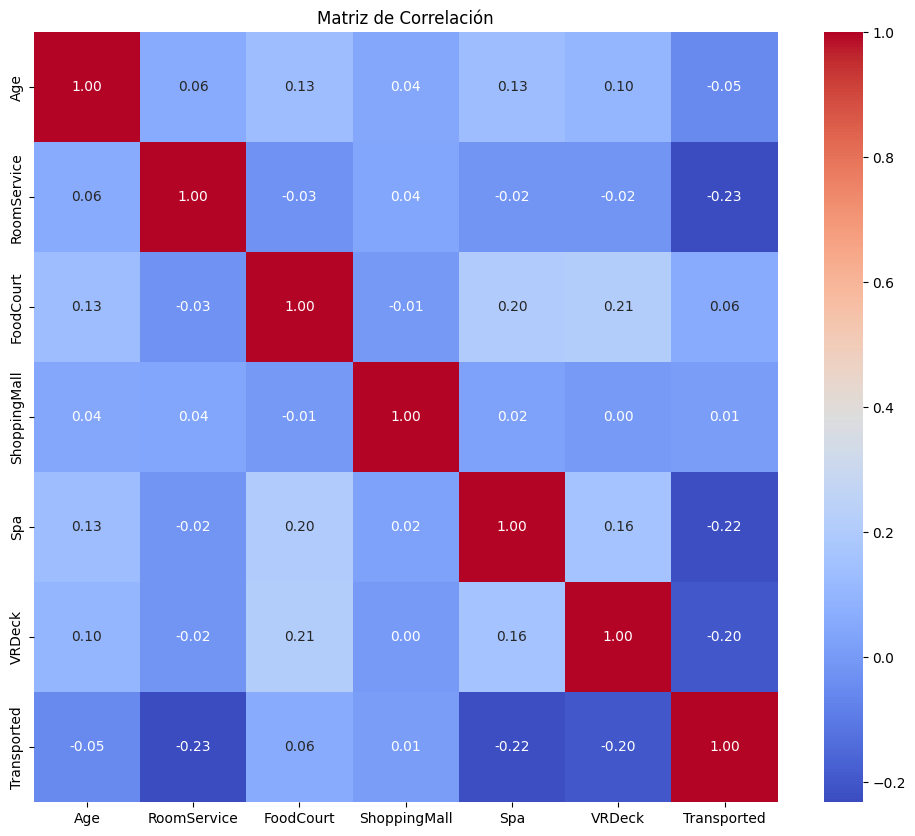

In [436]:
# Seleccionar solo columnas numéricas
numeric_columns = X_train.select_dtypes(include=['number']).columns
correlation_data = pd.concat([X_train[numeric_columns], y_train], axis=1)

# Calcular la matriz de correlación
correlation_matrix = correlation_data.corr()

# Crear un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


In [437]:
# Establecer un umbral para la correlación
correlation_threshold = 0.1

# Seleccionar las variables con correlación absoluta mayor al umbral
important_features = correlation_matrix["Transported"].abs() > correlation_threshold

# Filtrar la matriz de correlación
important_correlations = correlation_matrix.loc[important_features, "Transported"]

# Imprimir las correlaciones importantes
print("Correlaciones importantes:")
print(important_correlations)


Correlaciones importantes:
RoomService   -0.231961
Spa           -0.223594
VRDeck        -0.198303
Transported    1.000000
Name: Transported, dtype: float64


Las variables seleccionadas son:
- RoomService
- Spa
- VRDeck

#### 7. Normalizador

In [438]:
# Seleccionar solo las variables elegidas
selected_features = ['RoomService', 'Spa', 'VRDeck']

# Crear un DataFrame con las variables seleccionadas
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]

# Inicializar el normalizador
scaler = StandardScaler()

# Ajustar y transformar el conjunto de entrenamiento
X_train_scaled = scaler.fit_transform(X_train_selected)

# Transformar los conjuntos de validación y prueba utilizando la misma transformación que se aplicó al conjunto de entrenamiento
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)


#### 8. Ajuste de hiperparámetros

In [439]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo de regresión logística
model = LogisticRegression()

# Definir los hiperparámetros a ajustar
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2']}

# Realizar la búsqueda en cuadrícula
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Mostrar los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)


Mejores hiperparámetros: {'C': 100, 'penalty': 'l2'}


LogisticRegression(C=100)

### 9. Entrenamiento del modelo:
Usando `Regresión Logística`

In [440]:
# Crear una instancia del modelo con los mejores hiperparámetros
final_model = LogisticRegression(C=100, penalty='l2', solver='lbfgs')

# Entrenar el modelo con el conjunto de entrenamiento
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=100)

### 10. Testeo del modelo

In [441]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predecir las etiquetas para el conjunto de prueba
y_pred = final_model.predict(X_test_scaled)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

# Mostrar la matriz de confusión y el informe de clasificación
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión del modelo en el conjunto de prueba: {100 * accuracy:.2f}%')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nInforme de Clasificación:')
print(class_report)


Precisión del modelo en el conjunto de prueba: 75.27%

Matriz de Confusión:
[[532 333]
 [ 97 777]]

Informe de Clasificación:
              precision    recall  f1-score   support

       False       0.85      0.62      0.71       865
        True       0.70      0.89      0.78       874

    accuracy                           0.75      1739
   macro avg       0.77      0.75      0.75      1739
weighted avg       0.77      0.75      0.75      1739



#### **Trabajando con test.csv**

In [442]:
# Evaluación del modelo con el conjunto de prueba (test.csv)
# Cargar el conjunto de prueba
test_data = "test.csv"
df_test = pd.read_csv(test_data)

# Aplicar la función de limpieza al conjunto de prueba
df_test = clean_data(df_test)

# Verificar si quedan valores nulos después de la limpieza
nulls_after_cleaning = df_test.isnull().sum()
print("Valores nulos después de la limpieza:")
print(nulls_after_cleaning)

# Selección de variables en el conjunto de prueba
X_test = df_test[['RoomService', 'Spa', 'VRDeck']]

# Escalado del conjunto de prueba con el mismo escalador utilizado para el conjunto de entrenamiento
X_test_scaled = scaler.transform(X_test)

# Predicciones en el conjunto de prueba
y_test_pred = final_model.predict(X_test_scaled)

# Guardar las predicciones en una columna 'PredictedTransported'
df_test['PredictedTransported'] = y_test_pred

# Guardar las predicciones en un archivo CSV
df_test[['PassengerId', 'PredictedTransported']].to_csv('predictions.csv', index=False)

# Selección de la columna correcta al calcular las métricas
accuracy = accuracy_score(df_test['PredictedTransported'], y_test_pred)
conf_matrix = confusion_matrix(df_test['PredictedTransported'], y_test_pred)
class_report = classification_report(df_test['PredictedTransported'], y_test_pred)

# Mostrar las métricas
print(f'Precisión del modelo en el conjunto de prueba: {100 * accuracy:.2f}%')
print('\nMatriz de Confusión:')
print(conf_matrix)
print('\nInforme de Clasificación:')
print(class_report)


Valores nulos después de la limpieza:
PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64
Precisión del modelo en el conjunto de prueba: 100.00%

Matriz de Confusión:
[[1644    0]
 [   0 2633]]

Informe de Clasificación:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1644
        True       1.00      1.00      1.00      2633

    accuracy                           1.00      4277
   macro avg       1.00      1.00      1.00      4277
weighted avg       1.00      1.00      1.00      4277



C:\Users\nahue\AppData\Local\Temp\ipykernel_28460\3616947409.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


### 11. Guardando el modelo y el normalizador

In [443]:
import pickle
# Exportar el modelo y el escalador a archivos .pickle
# Path del model y el scaler
MODEL_PATH = 'model_test.pkl'
SCALER_PATH = 'scaler_test.pkl'
# Guardar el modelo y el escalador en archivos pickle
# Guardar el model usando pickle
with open(MODEL_PATH, 'wb') as model_file:
    pickle.dump(final_model, model_file)

# Guardar el scaler usando pickle
with open(SCALER_PATH, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


### 12. Crear archivo .py: Este código se pasa a un main.py

In [444]:
# import sys
# import pickle
# from sklearn.linear_model import LogisticRegression
# from sklearn.preprocessing import StandardScaler

# # Path del model y el scaler
# MODEL_PATH = 'model_test.pkl'
# SCALER_PATH = 'scaler_test.pkl'

# # Cargar el model y el scaler de los archivos
# with open(MODEL_PATH, 'rb') as model_file, open(SCALER_PATH, 'rb') as scaler_file:
#     model = pickle.load(model_file)
#     scaler = pickle.load(scaler_file)

# # Chequear el modelo
# print(model)

# # Código para terminal
# if len(sys.argv) > 1:
#     arguments = sys.argv[1:]

#     input_data = [float(arg) for arg in arguments]

#     scaled_input = scaler.transform([input_data])

#     # Predicción
#     prediction = model.predict(scaled_input)

#     print(f'Prediction: {prediction[0]}')
# else:
#     print('No arguments provided. Please provide input for prediction.')


#### Valores para reemplazar en los argumentos

In [445]:
import pandas as pd

# Cargar el conjunto de prueba
X_test = pd.read_csv("test.csv") 

# Imprimir algunos valores para las características seleccionadas
room_service_values = X_test['RoomService'].sample(5).tolist()
spa_values = X_test['Spa'].sample(5).tolist()
vr_deck_values = X_test['VRDeck'].sample(5).tolist()

print("Ejemplos de valores para RoomService:", room_service_values)
print("Ejemplos de valores para Spa:", spa_values)
print("Ejemplos de valores para VRDeck:", vr_deck_values)

Ejemplos de valores para RoomService: [0.0, 684.0, 0.0, 0.0, nan]
Ejemplos de valores para Spa: [90.0, 0.0, 63.0, 0.0, 0.0]
Ejemplos de valores para VRDeck: [3129.0, 0.0, 0.0, 790.0, 1757.0]


### 13. Crear requirements.txt

### 14. ~~Crear dockerfile~~
Este paso no se realiza según indicación de la **clase**

### 15. Crear repositorio en GitHub

### 16. Guardar el código en el repositorio